In [33]:
import os
import pandas as pd
import seaborn as sns
import numpy as np

 The Dataset

This dataset is a collection of samples obtained from the National Institute of Diabetes and Digestive and Kidney Disease, which you can find @ NYU Classes/Assignments/Final project.


The goal is to predict whether an individual has diabetes or not.
The attributes are :

    Pregnancies: Number of times pregnant

    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

    BloodPressure: Diastolic blood pressure (mm Hg)

    SkinThickness: Triceps skin fold thickness (mm)

    Insulin: 2-Hour serum insulin (mu U/ml)

    BMI: Body mass index (weight in kg/(height in m)^2)

    DiabetesPedigreeFunction: Diabetes pedigree function

    Age: Age (years)
    Outcome: Class variable (0 or 1) where 1 means they have diabetes.


Things to do
Load the PimaIndianDiabetes.csv dataset.

In [34]:
diabetes_data = pd.read_csv("PimaIndiansDiabetes.csv")

In [35]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



### Q1: Which variables are numeric and which are categorical? Explain why. (20pts)

Make sure to convert the variables to the correct type.

All of the variables are numeric except "Outcome" which is categorical because it is either 0 or 1.

In [36]:
diabetes_data.Outcome = diabetes_data.Outcome.astype('category')


### Q2: Which of the variables ( on their own ) are most helpful in predicting the outcome? (20pts)

    For each variable draw an appropriate graph ( boxplot or violinplot for numerical values and barplot for categorical values). Explain your answer.



<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

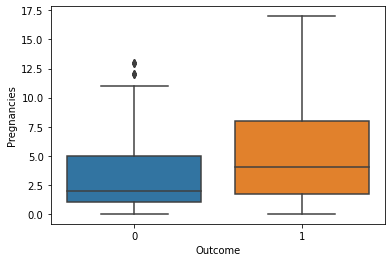

In [37]:
sns.boxplot(y=diabetes_data.Pregnancies, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

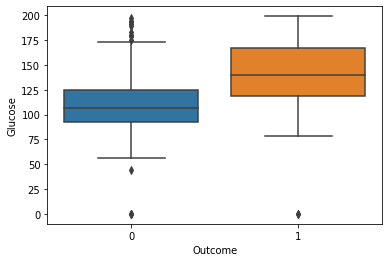

In [38]:
sns.boxplot(y=diabetes_data.Glucose, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

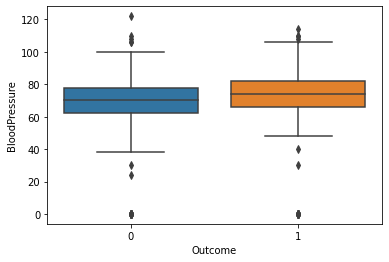

In [39]:
sns.boxplot(y=diabetes_data.BloodPressure, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

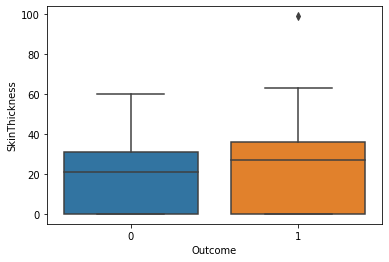

In [40]:
sns.boxplot(y=diabetes_data.SkinThickness, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

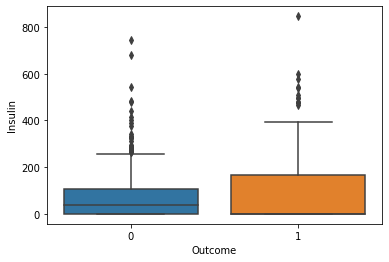

In [41]:
sns.boxplot(y=diabetes_data.Insulin, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

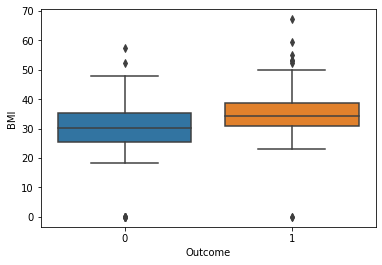

In [42]:
sns.boxplot(y=diabetes_data.BMI, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

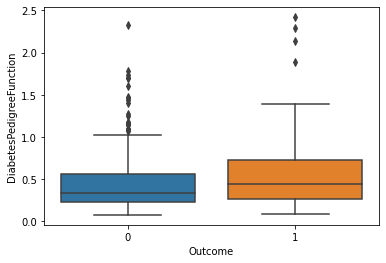

In [43]:
sns.boxplot(y=diabetes_data.DiabetesPedigreeFunction, x=diabetes_data.Outcome)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

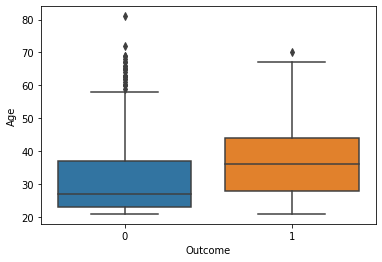

In [44]:
sns.boxplot(y=diabetes_data.Age, x=diabetes_data.Outcome)

<AxesSubplot:>

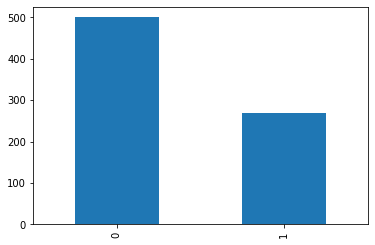

In [45]:
outcome=diabetes_data["Outcome"].value_counts()
outcome.plot(kind="bar")


### Q3: How do we fix missing values? (20pts)

    Notice that some of the values are missing and replaced with 0. For example a blood pressure of 0 doesn’t make sense and it can have an impact on the models. So how do we identify which 0 reoresents the value 0 and which represents NA? Explain your answer.



In [46]:
display(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


None

In [47]:
display(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we can see that the columns in the diabetes data are non-null and does not have any nulls. This is because the null values are replaced with 0 in some values. So to fix it we have to identify and see what kind of value type could be considered could be zero or zero doesn't make sense for it.

Now to make a judgement, if you see the columns Glucose, Blood Pressure, Skin Thickness, Insulin and BMI, 0 does not make sense for them! If we see 0 in pregnancies, it does make sense that they had some kind of complications. DiabetesPedigreeFunction column does not have a zero, so we can leave that for judgement. And Outcome could be 0 or 1, so its okay.

To make the machine observe the columns as null, I will convert those specific columns from 0 to NA.

In [48]:
diabetes_data1 = diabetes_data.copy()
diabetes_data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes_data1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=diabetes_data1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [50]:
display(diabetes_data1.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [51]:
diabetes_data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [52]:
diabetes_data1.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [53]:
print(diabetes_data1.Glucose.mean())
print(diabetes_data1.BloodPressure.mean())
print(diabetes_data1.SkinThickness.mean())
print(diabetes_data1.Insulin.mean())
print(diabetes_data1.BMI.mean())

121.6867627785059
72.40518417462484
29.153419593345657
155.5482233502538
32.457463672391015


In [54]:
#train_data.median()

In [55]:
diabetes_data2 = diabetes_data1.copy()

In [56]:
test_data = diabetes_data2.dropna()
test_data = test_data.sample(154, random_state=32)


whole_index = diabetes_data2.index
test_index = test_data.index
train_index = whole_index.difference(test_index)

train_data = diabetes_data2.loc[train_index,]

In [57]:
test_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
train_data.median()

Pregnancies                   3.000
Glucose                     117.000
BloodPressure                72.000
SkinThickness                30.000
Insulin                     125.000
BMI                          32.400
DiabetesPedigreeFunction      0.353
Age                          30.000
dtype: float64

In [59]:
train_data.loc[(train_data['Glucose'].isnull()), 'Glucose'] = 117
train_data.loc[(train_data['BloodPressure'].isnull()), 'BloodPressure'] = 72.00
train_data.loc[(train_data['SkinThickness'].isnull()), 'SkinThickness'] = 30.00
train_data.loc[(train_data['Insulin'].isnull()), 'Insulin'] = 125.00
train_data.loc[(train_data['BMI'].isnull()), 'BMI'] = 32.4


In [60]:
diabetes_data2.loc[(diabetes_data2['Glucose'].isnull()), 'Glucose'] = 117
diabetes_data2.loc[(diabetes_data2['BloodPressure'].isnull()), 'BloodPressure'] = 72
diabetes_data2.loc[(diabetes_data2['SkinThickness'].isnull()), 'SkinThickness'] = 30
diabetes_data2.loc[(diabetes_data2['Insulin'].isnull()), 'Insulin'] = 125
diabetes_data2.loc[(diabetes_data2['BMI'].isnull()), 'BMI'] = 32.40


In [61]:
train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now I have marked all the NAs in the dataset, so I can go over and fix the nulls by replacing with the median values of each column discussed above.

In [62]:
x_test = np.array(test_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"]])
y_test = np.array(test_data["Outcome"])

x_train = np.array(train_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"]])
y_train = np.array(train_data["Outcome"])

In [188]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import math

In [190]:
data_knn1 = KNeighborsClassifier(n_neighbors=89).fit(x_train, y_train)

predicted1 = data_knn1.predict(x_test)

predicted_proba1 = data_knn1.predict_proba(x_test)

In [191]:
con_mat1 = confusion_matrix(y_test, predicted1)
print(con_mat1)

print("accuracy:",accuracy_score(y_test, predicted1))
print("recall:", recall_score(y_test, predicted1))
print("precision:",precision_score(y_test,predicted1))

[[95  7]
 [31 21]]
accuracy: 0.7532467532467533
recall: 0.40384615384615385
precision: 0.75


In [192]:
fpr, tpr, threshold = roc_curve(y_test, predicted_proba1[:,1])

roc_auc = auc(fpr, tpr)

print("AUC of the model with k-value of  is: ", roc_auc)

AUC of the model with k-value of  is:  0.8346530920060332


In [67]:
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.metrics import roc_auc_score
import warnings

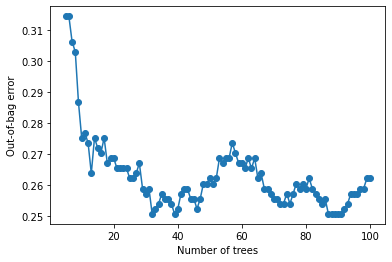

In [166]:
# supress warnings
warnings.simplefilter('ignore')

# examine different number of trees from 1 to 100
min_estimators = 5
max_estimators = 100

# results list
n_trees = []
oob_errors = []

# iterate from n_estimators = 5 to n_estimators = 50
for i in range(min_estimators, max_estimators+1):
    clf = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=32)
    clf.fit(x_train, y_train)
    n_trees.append(i)
    oob_errors.append(1 - clf.oob_score_)
    
    
    
    
plt.plot(n_trees, oob_errors, '-o')
plt.ylabel('Out-of-bag error')
plt.xlabel('Number of trees')
plt.show()



In [168]:
warnings.simplefilter("ignore")

data_RF1 = RandomForestClassifier(n_estimators=39, oob_score=True, random_state=32)
data_RF1.fit(x_train, y_train)
print("Out of bag error:" ,1 - data_RF1.oob_score_)

Out of bag error: 0.250814332247557


In [169]:
data_imp = {"importances": data_RF1.feature_importances_,
        "feature": diabetes_data.columns[:-1]}
data_plt = pd.DataFrame(data_imp)
data_plt = data_plt.sort_values(by=['importances'], ascending=False)
data_plt

,importances,feature
1,0.257664,Glucose
5,0.158899,BMI
6,0.142901,DiabetesPedigreeFunction
7,0.122378,Age
2,0.095443,BloodPressure
0,0.077555,Pregnancies
3,0.076790,SkinThickness
4,0.068372,Insulin


<AxesSubplot:xlabel='importances', ylabel='feature'>

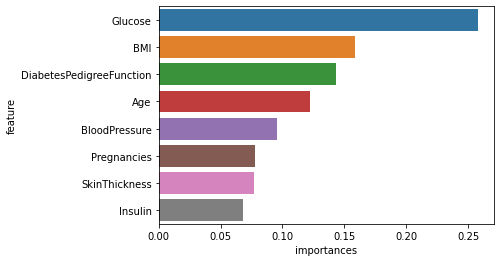

In [170]:
sns.barplot(x="importances", y="feature", data=data_plt)

In [183]:
predict_test = data_RF1.predict_proba(x_test) [:, 1]

auc = roc_auc_score(y_test, predict_test)

print("The AUC for the best model of Random Forest is: ", auc)

The AUC for the best model of Random Forest is:  0.8574660633484162


In [193]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [222]:
svm_model1 = SVC(C=2, kernel="linear", probability=True, random_state=42)

svm_model1.fit(x_train, y_train)

pred1 = svm_model1.predict(x_test)

x1 = confusion_matrix(y_test, svm_model1.predict(x_test))
print(x1)

print("accuracy:",accuracy_score(y_test, pred1))
print("recall:", recall_score(y_test, pred1))
print("precision:",precision_score(y_test,pred1))

[[91 11]
 [23 29]]
accuracy: 0.7792207792207793
recall: 0.5576923076923077
precision: 0.725


In [223]:
print("AUC for the test_set at cost of is: ", roc_auc_score(y_test, svm_model1.predict_proba(x_test)[:, 1]))

AUC for the test_set at cost of is:  0.865761689291101


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics

In [225]:
#logistic_regression_data
logistic_reg_all = LogisticRegression(penalty = "none").fit(x_train, y_train)

#logistic regression all predict probabilty
predict_logistic_reg_all = logistic_reg_all.predict_proba(x_test)[:, 1]

#auc score for all
e = roc_auc_score(y_test, predict_logistic_reg_all)
print("AUC for all 4 variables together: ", e)

AUC for all 4 variables together:  0.8470965309200603


## 